In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df['Genre'].value_counts(normalize=True) * 100

Genre
Female    56.0
Male      44.0
Name: proportion, dtype: float64

In [10]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [11]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [12]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [13]:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [18]:
df.groupby('Genre')['Age'].mean()

Genre
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

In [16]:
df.groupby('Genre')['Spending Score (1-100)'].mean()

Genre
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [17]:
df.groupby('Genre')['Annual Income (k$)'].mean()

Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [22]:
df.groupby('Age')['Annual Income (k$)'].mean()

Age
18     51.250000
19     57.000000
20     41.600000
21     38.800000
22     31.333333
23     41.500000
24     39.250000
25     57.666667
26     58.000000
27     63.166667
28     85.250000
29     63.600000
30     76.142857
31     48.375000
32     87.181818
33     80.333333
34     79.000000
35     46.666667
36     81.000000
37     65.000000
38     74.500000
39     72.666667
40     61.666667
41    101.000000
42     60.000000
43     65.666667
44     75.500000
45     69.333333
46     59.000000
47     70.166667
48     58.200000
49     51.000000
50     58.600000
51     55.500000
52     55.500000
53     39.500000
54     59.750000
55     57.000000
56     79.000000
57     64.500000
58     54.000000
59     65.250000
60     43.333333
63     56.500000
64     19.000000
65     50.500000
66     63.000000
67     45.500000
68     56.666667
69     44.000000
70     47.500000
Name: Annual Income (k$), dtype: float64

In [23]:
df.groupby('Age')['Spending Score (1-100)'].mean()

Age
18    60.000000
19    39.750000
20    40.200000
21    66.800000
22    70.000000
23    63.333333
24    71.500000
25    39.666667
26    54.500000
27    60.333333
28    70.000000
29    76.600000
30    80.285714
31    63.875000
32    66.000000
33    54.333333
34    39.200000
35    63.888889
36    52.500000
37    15.333333
38    63.166667
39    84.666667
40    47.500000
41    28.000000
42    18.500000
43    34.000000
44    13.500000
45    37.666667
46    21.333333
47    28.500000
48    41.800000
49    42.714286
50    45.800000
51    46.500000
52    21.000000
53    25.000000
54    35.750000
55    58.000000
56    35.000000
57    28.000000
58    15.000000
59    33.000000
60    36.333333
63    47.000000
64     3.000000
65    43.500000
66    49.000000
67    41.500000
68    48.666667
69    46.000000
70    55.500000
Name: Spending Score (1-100), dtype: float64

In [24]:
df['Age'].nunique()

51

<function matplotlib.pyplot.show(close=None, block=None)>

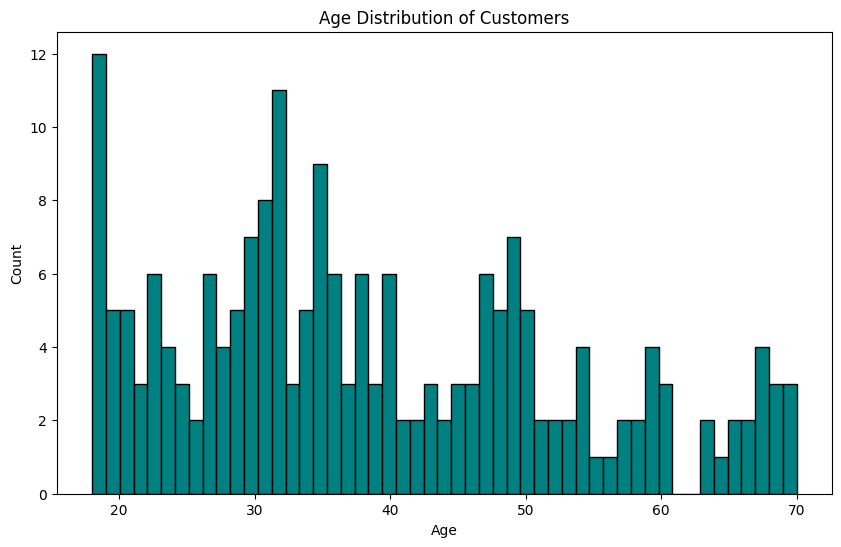

In [45]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=51, color='teal', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show

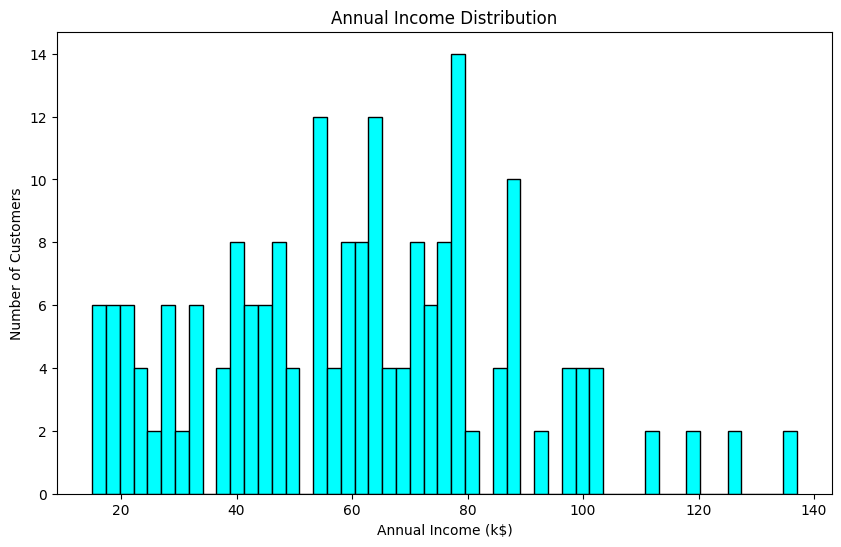

In [46]:
plt.figure(figsize=(10,6))
plt.hist(df['Annual Income (k$)'], bins=51, color='cyan', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()


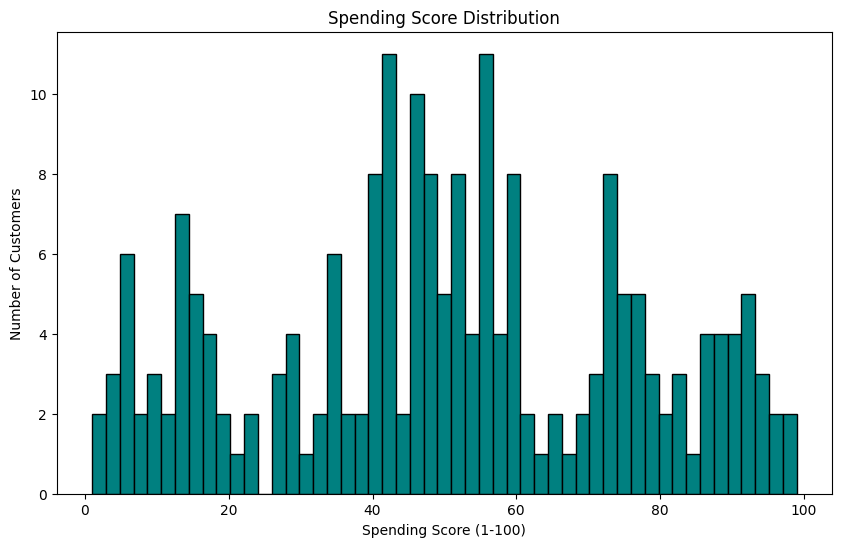

In [47]:
plt.figure(figsize=(10,6))
plt.hist(df['Spending Score (1-100)'], bins=51, color='teal', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.show()


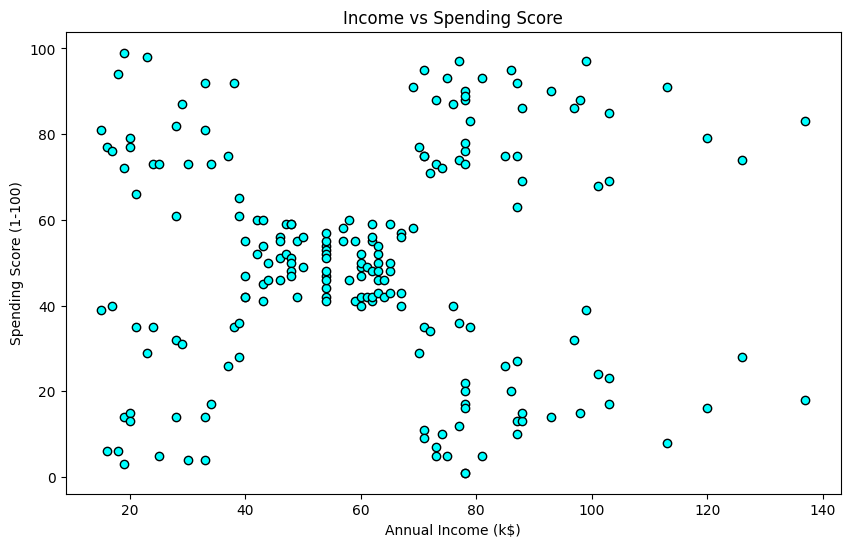

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c='cyan', edgecolor='k')
plt.title('Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


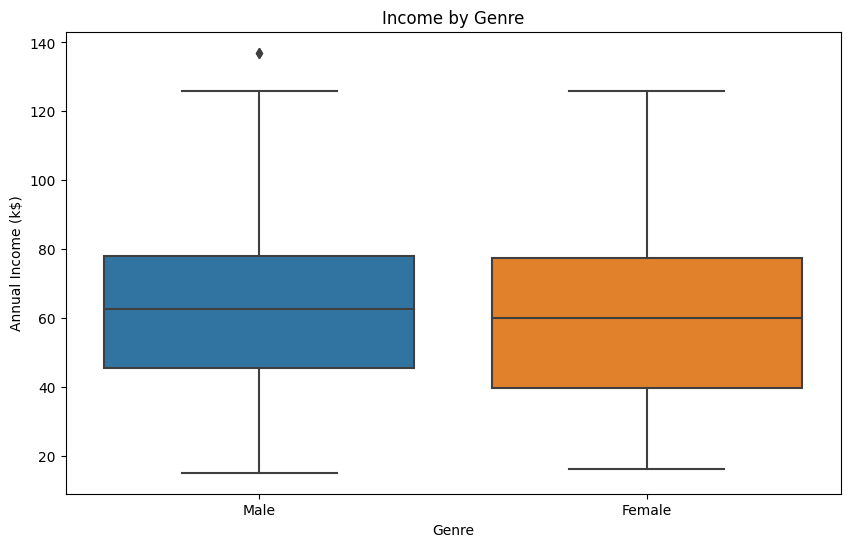

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Genre', y='Annual Income (k$)')
plt.title('Income by Genre')
plt.show()


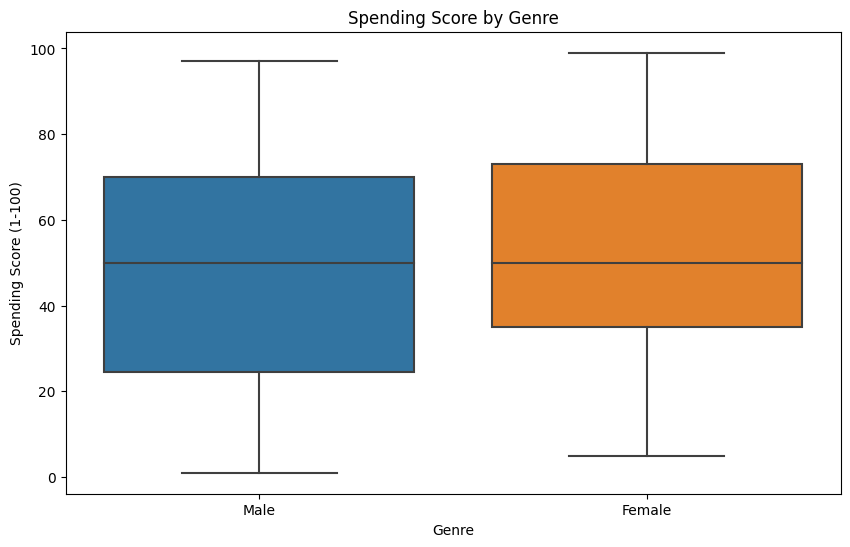

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Genre', y='Spending Score (1-100)')
plt.title('Spending Score by Genre')
plt.show()


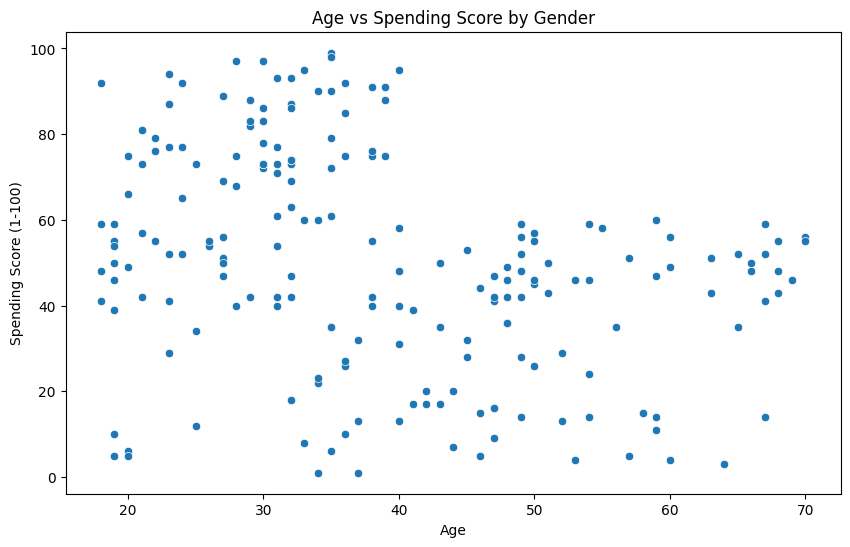

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')
plt.title('Age vs Spending Score by Gender')
plt.show()


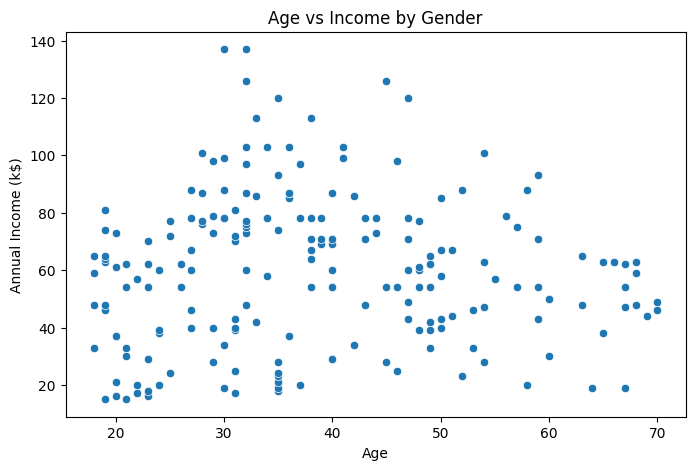

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)')
plt.title('Age vs Income by Gender')
plt.show()


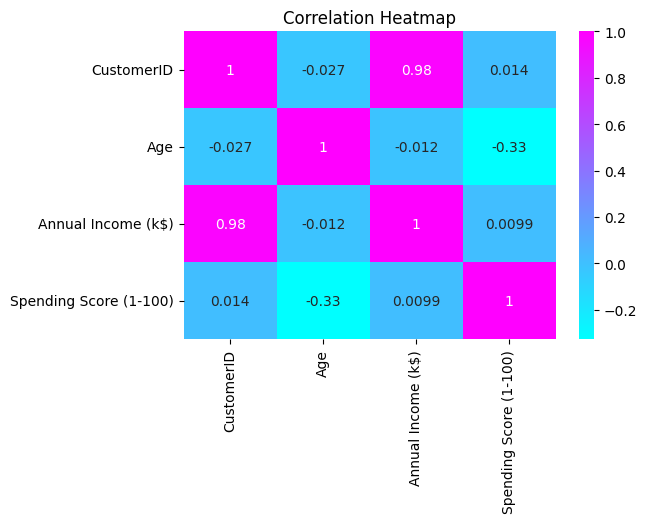

In [53]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()


In [56]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
Preds = kmeans.predict(X)
Preds


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

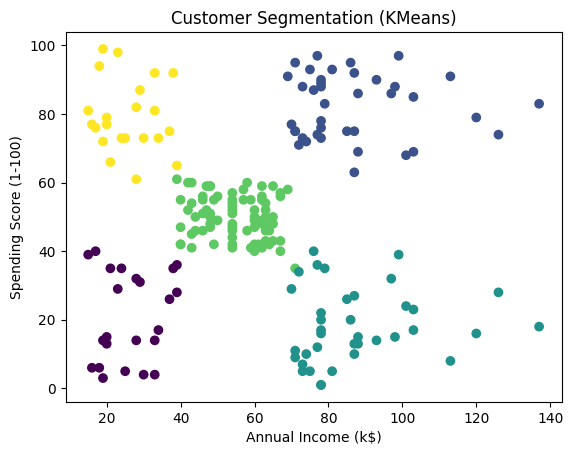

In [57]:
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=Preds)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (KMeans)')
plt.show()